In [0]:
#API for NN
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 36s 0us/step


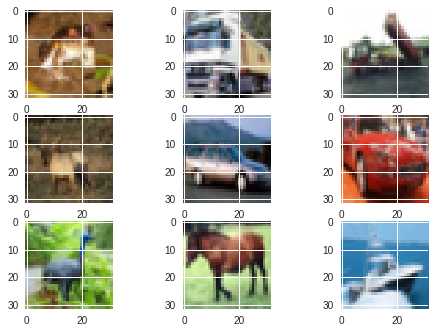

In [0]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    
# show the plot
plt.show()

In [0]:
print(X_train[0].shape)

(32, 32, 3)


In [0]:
seed = 8
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
#one hot vectoring 6 =[0000001000]
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#layer one after another seq
from keras.models import Sequential
#Dropout is for regularization overfitting
#activation relu selu tanh sofymax
#conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
#reduce the spatial size of the representation
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
#Stochastic gradient descent optimizer
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    #96 filters 3*3 convolution 
    #Stride is the number of pixels shifts over the input matrix
    #Drop the part of the image where the filter did not fit. This is called valid padding which keeps only valid part of the image
    #same paddind = stride=1 no padding output of the same size as the input
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

In [0]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
#momentum = Parameter that accelerates SGD in the relevant direction and dampens oscillations
#nesterov momentum type
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [0]:

# define additional training parameters
epochs = 10
batch_size = 64

# fit the model
#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1198 - acc: 0.9571 - val_loss: 0.8096 - val_acc: 0.8345
Epoch 2/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1116 - acc: 0.9606 - val_loss: 0.8298 - val_acc: 0.8326
Epoch 3/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1122 - acc: 0.9602 - val_loss: 0.8629 - val_acc: 0.8292
Epoch 4/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1137 - acc: 0.9604 - val_loss: 0.7698 - val_acc: 0.8315
Epoch 5/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1042 - acc: 0.9636 - val_loss: 0.8426 - val_acc: 0.8265
Epoch 6/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1061 - acc: 0.9634 - val_loss: 0.8218 - val_acc: 0.8420
Epoch 7/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1067 - acc: 0.9618 - val_loss: 0.8791 - val_acc

In [0]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 4s 391us/step
Accuracy: 82.57%


9/9 [==============================] - 0s 969us/step


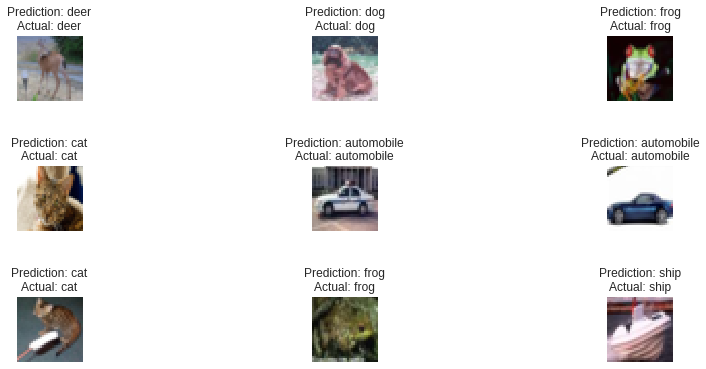

In [29]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)
class_result = np.argmax(predictions,axis=-1)
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()